# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [44]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from statsmodels.stats.proportion import binom_test
from scipy import stats

In [45]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [46]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [47]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
993,21001,Kentucky,Adair,18852,9308,9544,1.8,93.7,2.7,0.1,...,2.6,0.8,2.9,22.7,7700,74.0,14.6,11.2,0.1,7.7
996,21007,Kentucky,Ballard,8256,4098,4158,1.2,93.4,3.4,0.5,...,0.8,2.5,2.6,23.7,3489,79.9,11.7,8.4,0.0,6.2
2460,47065,Tennessee,Hamilton,348121,167812,180309,4.9,71.6,19.7,0.1,...,2.1,1.3,4.2,21.6,162818,79.6,14.3,5.9,0.2,8.0
2305,42123,Pennsylvania,Warren,40962,20500,20462,0.9,97.2,0.5,0.1,...,4.5,1.8,2.8,20.5,18545,79.9,12.4,7.3,0.3,6.6
2039,38099,North Dakota,Walsh,11005,5635,5370,10.6,85.7,0.2,1.5,...,5.1,0.9,5.4,17.2,5457,73.5,15.0,11.1,0.4,3.3
649,17109,Illinois,McDonough,32009,15654,16355,2.7,88.4,4.7,0.2,...,8.0,1.8,3.3,14.9,14279,65.8,28.7,5.3,0.2,9.4
1651,30107,Montana,Wheatland,2115,1087,1028,2.1,94.8,0.0,0.7,...,23.5,0.0,14.8,9.6,917,51.4,9.5,33.0,6.1,3.4
1301,26141,Michigan,Presque Isle,13037,6502,6535,1.1,96.4,0.5,0.4,...,2.7,1.6,4.5,24.8,4490,76.8,15.8,6.9,0.5,13.1
1801,35011,New Mexico,De Baca,2020,907,1113,45.1,50.2,0.0,0.0,...,2.8,2.1,7.4,12.7,619,66.2,25.5,8.2,0.0,5.2
2214,41013,Oregon,Crook,20956,10352,10604,7.4,88.8,0.3,0.9,...,3.8,1.4,6.0,21.3,8014,74.7,15.1,10.0,0.1,13.5


- We will focus first on income per capita across counties.

<Axes: >

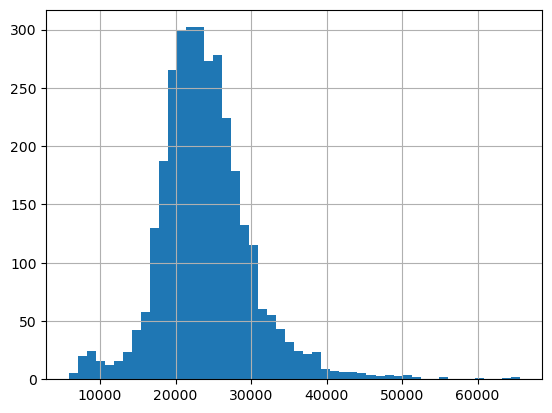

In [48]:
df['IncomePerCap'].hist(bins = 50)

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [49]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [50]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [51]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [52]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [53]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

206437.3
1106871.9


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [54]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354239015e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [55]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

##### Pearson Vs Spearman correlation coefficients
Pearson and Spearman correlation coefficients both measure the strength of the relationship between two variables, but they differ in key ways:
- Pearson correlation measures the linear relationship between two continuous variables. It assumes both variables are normally distributed and is sensitive to outliers.
- Spearman correlation measures the rank order relationship between variables. It’s non-parametric, meaning it doesn't assume normality and is better suited for monotonic relationships (where variables increase together but not necessarily linearly).

In short: Pearson is for linear relationships, while Spearman is for monotonic relationships.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [56]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [57]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [58]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

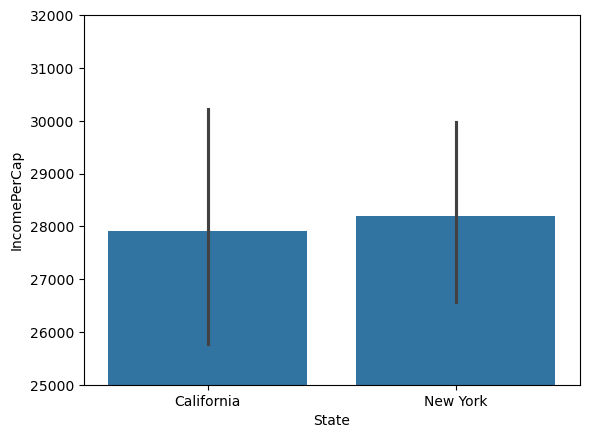

In [59]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [79]:
pearson_corr, pearson_p = stats.pearsonr(df['IncomePerCap'], df['SelfEmployed'])
print("Pearson correlation: ", pearson_corr)
print("p-value: ", pearson_p)

Pearson correlation:  0.08727386609551788
p-value:  7.052861196524553e-07


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

<Axes: xlabel='IncomePerCap', ylabel='SelfEmployed'>

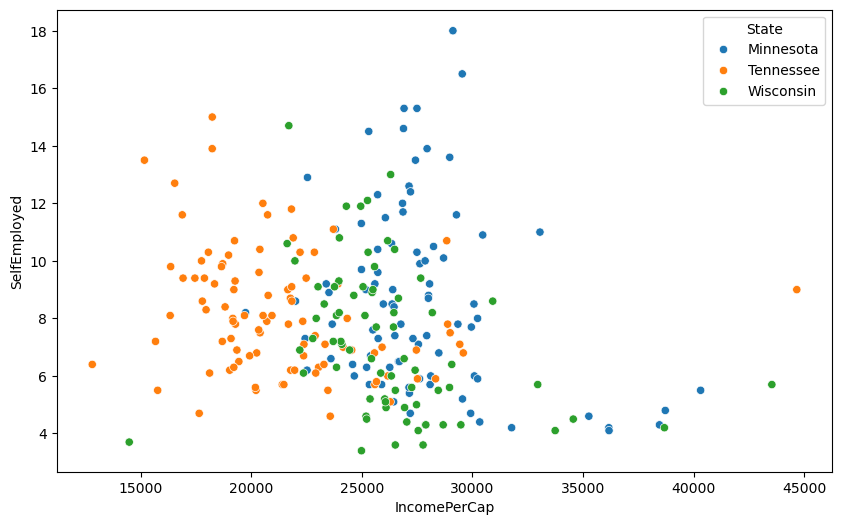

In [80]:
SetA = df[df['State'].isin(['Wisconsin', 'Tennessee', 'Minnesota'])]

# Display the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'IncomePerCap', y = 'SelfEmployed', data = SetA, hue = 'State')

In [83]:
pearsoncorr, pearsonp = stats.pearsonr(SetA['IncomePerCap'], SetA['SelfEmployed'])
print("pearson correlation: ", pearsoncorr)
print("Spearman p-value: ", pearsonp)

pearson correlation:  -0.202293507365215
Spearman p-value:  0.0011881639322138644


**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [84]:
# Compute the correlation matrix
for state in SetA['State'].unique():
    pearson_corr, pearson_p = stats.pearsonr(SetA[SetA['State'] == state]['IncomePerCap'], SetA[SetA['State'] == state]['SelfEmployed'])
    print("pearson correlation for", state, ":", pearson_corr)
    print("pearson p-value for", state, ":", pearson_p)
    print("\n")

pearson correlation for Minnesota : -0.2538551921654062
pearson p-value for Minnesota : 0.01766519930091188


pearson correlation for Tennessee : -0.23836048684913147
pearson p-value for Tennessee : 0.020011631955528107


pearson correlation for Wisconsin : -0.32905300016378525
pearson p-value for Wisconsin : 0.004768134887745218




**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

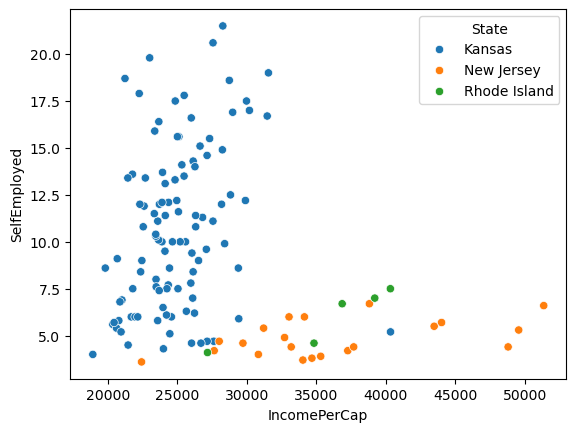

pearson correlation:  -0.2322214134608569
pearson p-value:  0.0076074930428573165


pearson correlation for Kansas : 0.2581029971443692
pearson p-value for Kansas : 0.007853351846832411


pearson correlation for New Jersey : 0.48044784713362815
pearson p-value for New Jersey : 0.027488944757806215


pearson correlation for Rhode Island : 0.9021788382149805
pearson p-value for Rhode Island : 0.036183102015759167




In [85]:
SetB = df[df['State'].isin(['New Jersey', 'Rhode Island', 'Kansas'])]

# Plot the data
sns.scatterplot(x = 'IncomePerCap', y = 'SelfEmployed', data = SetB, hue = 'State')
plt.show()

# Compute the overall correlation
pearsoncorr, pearsonp = stats.pearsonr(SetB['IncomePerCap'], SetB['SelfEmployed'])
print("pearson correlation: ", pearsoncorr)
print("pearson p-value: ", pearsonp)
print("\n")

# Compute the correlation in each state
for state in SetB['State'].unique():
    pearson_corr, pearson_p = stats.pearsonr(SetB[SetB['State'] == state]['IncomePerCap'], SetB[SetB['State'] == state]['SelfEmployed'])
    print("pearson correlation for", state, ":", pearson_corr)
    print("pearson p-value for", state, ":", pearson_p)
    print("\n")

Correlation:  -0.20180011227336406
Confidence interval:  -0.31817620908946453 -0.0790348100115594
Correlation:  -0.22855209884743213
Confidence interval:  -0.3468988993611674 -0.07728175630210186


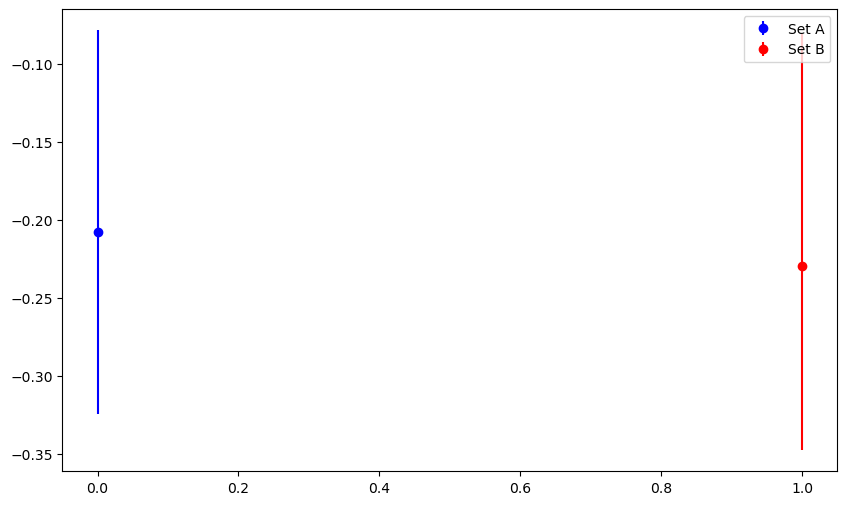

In [91]:
def correlation_bootstraping(values, n_iter=1000):
    # Compute the correlation with bootstrapping
    corr_values = np.zeros(n_iter)
    for i in range(n_iter):
        sample = np.random.choice(range(len(values)), len(values), replace=True)
        sample = values.iloc[sample]
        corr, _ = stats.pearsonr(sample['IncomePerCap'], sample['SelfEmployed'])
        corr_values[i] = corr

    # Compute the confidence interval
    lower = np.percentile(corr_values, 2.5)
    upper = np.percentile(corr_values, 97.5)

    # Return the confidence interval
    return corr_values.mean(), lower, upper

# Compute the correlation with bootstrapping (SetA)
corr, lower, upper = correlation_bootstraping(SetA)
print("Correlation: ", corr)
print("Confidence interval: ", lower, upper)

# Compute the correlation with bootstrapping (SetB)
corr, lower, upper = correlation_bootstraping(SetB)
print("Correlation: ", corr)
print("Confidence interval: ", lower, upper)

# Plot the two results with histograms
plt.figure(figsize=(10, 6))
plt.errorbar(0, correlation_bootstraping(SetA)[0], yerr=[[correlation_bootstraping(SetA)[0] - correlation_bootstraping(SetA)[1]], [correlation_bootstraping(SetA)[2] - correlation_bootstraping(SetA)[0]]], fmt='o', label='Set A', color='blue')
plt.errorbar(1, correlation_bootstraping(SetB)[0], yerr=[[correlation_bootstraping(SetB)[0] - correlation_bootstraping(SetB)[1]], [correlation_bootstraping(SetB)[2] - correlation_bootstraping(SetB)[0]]], fmt='o', label='Set B', color='red')
plt.legend()
plt.show()

# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [66]:
# We can do the following consideration:
# - The number of element between 105 and 114 is 25 % of the total number of elements. 
# - The number of elements between 126 and 146 is 25 % of the total number of elements.
# - The number of elements between 114 and 126 is 50 % of the total number of elements.
# Since we know that the 20th percentile is 110000 it means thet 5 % of elements is between 110000 ad 114000.

print(0.05 * 7000)

350.0


### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [67]:
# We can do the following consideration in the case of showing the distribution of a signle continuous variable:
# - Barplot are not indicated for continuous variables. They are used for categorical variables.
# - Histograms are used to show the distribution of a single continuous variable.
# - Boxplots are used to show the distribution of a single continuous variable.
# - Scatter plots are used to show the relationship between two continuous variables (this is very important).
# As a consequence the correct answer is (B): BoxPlot and Histogram.

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [77]:
# Since here we say that the probability of successful treatment in the study is the same
# as the probability of reporting feeling better under placebo it means that the probability
# of success of the treatment, given that the placebo probability is 20%, is 40%.
# In this test we have that:
# H0: The probability of successful tratment is equal to the probability of reporting feeling better under placebo.

p_value = binom_test(28,100,0.2, alternative='larger')
print("p-value: ", p_value)

p-value:  0.03415162963907485


### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.


### Bootstraping
The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. It is often used as a powerful way to estimate the true distribution of statistics, such as the mean, median and other summary statistics. The advantage of the bootstrap method is that it is more robust than traditional methods, as it does not rely on assumptions about the distribution of the data.
The bootstraping method works as follows:
1. Sample n observations with replacement from the original dataset to create a bootstrap sample. The size of the bootstrap sample is the same as the original dataset.
2. Calculate the statistic of interest for the bootstrap sample.
3. Repeat steps 1 and 2 a large number of times (e.g., 1000) to create a distribution of the statistic of interest.
4. Calculate the confidence interval from the distribution of the statistic of interest.


### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [ ]:
# The correct answer is (C): ampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.

# Mean bootstrap function
def mean_bootstrap(sample, n_bootstrap):
    # Define the bootsrap_means list
    bootstrap_means = []

    # Iterate the process n_bootstrap times
    for _ in range(n_bootstrap):
        bootstrap_samples = np.random.choice(sample, len(sample), replace = True)
        bootstrap_mean = np.mean(bootstrap_samples)
        bootstrap_means.append(bootstrap_mean)

    # Compute the confidence interval (remember that we always assume that the mean has a normal distribution)
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)

    # Return the confidence interval
    return (lower_bound, upper_bound)

### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [ ]:
# The only correct answer here is (A).
# This is for the Simpson's paradox. 

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

In [ ]:
# The correct answer here is (D).
# We don't have any information about the distribution of the data so we cannot say if (A) or (B) are true.
# We for sure know that (C) is false because less than half of the pages get more than 200 requests (the median is 15).